In [95]:
from sklearn.metrics import confusion_matrix
from IPython.core.pylabtools import figsize
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:

archivo = '/content/drive/MyDrive/datos_mc.xlsx'
df1 = pd.read_excel(archivo, sheet_name='googlenet')
df2 = pd.read_excel(archivo, sheet_name='resnet18')
df3 = pd.read_excel(archivo, sheet_name='googlenet')
df4 = pd.read_excel(archivo, sheet_name='resnet18')
df1 = df1.to_numpy()
df2 = df2.to_numpy()
df3 = df3.to_numpy()
df4 = df4.to_numpy()
print(df1[:,1])


[3. 1. 1. 1. 1. 2. 1. 3. 3. 1. 2. 2. 2. 2. 2. 1. 3. 1. 2. 2. 3. 3. 3. 3.
 1. 2. 1. 3. 3. 3.]


In [97]:
def make_confusion_matrix(Ys,
                          Yps,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          title=None):
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    fig1 = plt.figure("Matrices de Confusion", figsize=(10,10))
    fig1.subplots_adjust(hspace=0.7, wspace=0.7)
    titlesA = ['GoogleNet','ResNet18','DenseNet121','ResNet101']
    for i in range(1, len(Ys)+1):
      cf2 = confusion_matrix(Ys[i-1], Yps[i-1])
      ##############################################
        # CODE TO GENERATE TEXT INSIDE EACH SQUARE
      blanks = ['' for i in range(cf2.size)]

      if group_names and len(group_names)==cf2.size:
          group_labels = ["{}\n".format(value) for value in group_names]
      else:
          group_labels = blanks

      if count:
          group_counts = ["{0:0.0f}\n".format(value) for value in cf2.flatten()]
      else:
          group_counts = blanks

      if percent:
          group_percentages = ["{0:.2%}".format(value) for value in cf2.flatten()/np.sum(cf2)]
      else:
          group_percentages = blanks

      box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
      box_labels = np.asarray(box_labels).reshape(cf2.shape[0],cf2.shape[1])


      # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
      if sum_stats:
          #Accuracy is sum of diagonal divided by total observations
          accuracy  = np.trace(cf2) / float(np.sum(cf2))
          stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
      else:
          stats_text = ""
      ###############################################
      ax = fig1.add_subplot(2,2,i)
      # MAKE THE HEATMAP VISUALIZATION
      
      sns.heatmap(cf2,annot=box_labels,fmt="",cmap='Blues',cbar=True,xticklabels=categories,yticklabels=categories)

      #ax.ylabel('Valor real')
      #ax.xlabel('Valor de predicción' + stats_text)
      
      
      #ax.title(titlesA[i-1])
    return fig1


In [98]:
y_google = df1[:,0]
y_pred_google = df1[:,1]
mc_google = confusion_matrix(y_google, y_pred_google)
print(mc_google)

[[6 1 3]
 [2 7 1]
 [2 1 7]]


In [99]:
y_rn18 = df2[:,0]
y_pred_rn18 = df2[:,1]
mc_rn18 = confusion_matrix(y_rn18, y_pred_rn18)
print(mc_rn18)

[[3 4 3]
 [2 7 1]
 [2 1 7]]


In [100]:
y_dn121 = df3[:,0]
y_pred_dn121 = df3[:,1]
mc_dn121 = confusion_matrix(y_dn121, y_pred_dn121)
print(mc_dn121)

[[6 1 3]
 [2 7 1]
 [2 1 7]]


In [101]:
y_rn101 = df4[:,0]
y_pred_rn101 = df4[:,1]
mc_rn101 = confusion_matrix(y_rn101, y_pred_rn101)
print(mc_rn101)

[[3 4 3]
 [2 7 1]
 [2 1 7]]


In [102]:
Ys = [y_google, y_rn18, y_dn121, y_rn101]
Yps = [y_pred_google, y_pred_rn18, y_pred_dn121, y_pred_rn101]

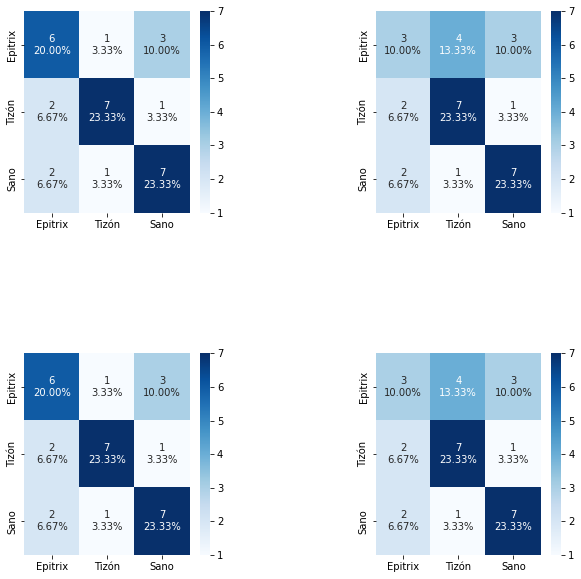

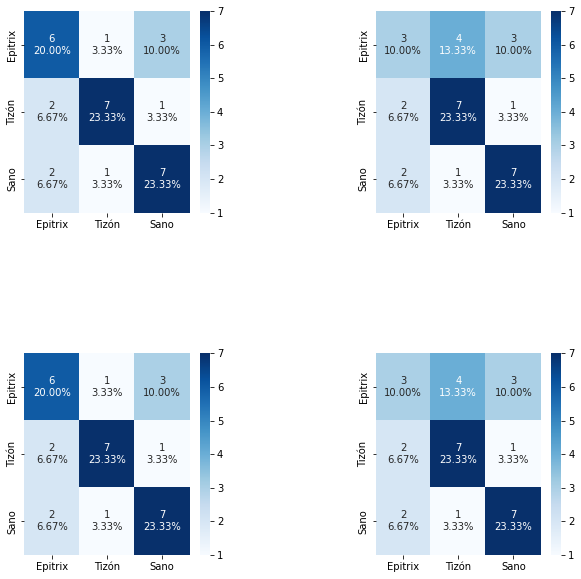

In [103]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categorieSs = ['Epitrix', 'Tizón', 'Sano']
make_confusion_matrix(Ys,
                      Yps, 
                      group_names=labels,
                      categories=categorieSs)